In [58]:
import csv

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from pprint import pprint

In [46]:
country_codes = {}
relays = []
with open('./Tor_query_EXPORT-1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        country_code = row['Country Code']
        if country_code not in country_codes:
            country_codes[country_code] = 0
        country_codes[country_code] += 1
        
        relay = {
            'name': row['Router Name'],
            'bandwidth': int(row['Bandwidth (KB/s)']),
            'country_code': row['Country Code'],
            'exit': bool(int(row['Flag - Exit'])),
            'guard': bool(int(row['Flag - Guard'])), 
            'middle': not bool(int(row['Flag - Exit'])) and not bool(int(row['Flag - Guard']))
        }
        relays.append(relay)

In [47]:
sorted_country_codes = sorted(country_codes.items(), key=lambda x: x[1], reverse=True)
print("Top 5 Countries hosting tor relays")
print(sorted_country_codes[:5])

Top 5 Countries hosting tor relays
[('DE', 1292), ('US', 1179), ('FR', 823), ('NL', 352), ('CA', 292)]


In [59]:
sorted_relays = sorted(relays, key=lambda x: x['bandwidth'], reverse=True)
print("Top 5 Bandwidth contributing relays")
pprint(sorted_relays[:5])

Top 5 Bandwidth contributing relays
[{'bandwidth': 117100,
  'country_code': 'US',
  'exit': True,
  'guard': True,
  'middle': False,
  'name': 'CalyxInstitute03'},
 {'bandwidth': 100409,
  'country_code': 'UA',
  'exit': True,
  'guard': True,
  'middle': False,
  'name': 'PinkiePieParty'},
 {'bandwidth': 86850,
  'country_code': 'FR',
  'exit': False,
  'guard': True,
  'middle': False,
  'name': 'Unnamed'},
 {'bandwidth': 80597,
  'country_code': 'FR',
  'exit': False,
  'guard': True,
  'middle': False,
  'name': 'Unnamed'},
 {'bandwidth': 78916,
  'country_code': 'FR',
  'exit': False,
  'guard': True,
  'middle': False,
  'name': 'Unnamed'}]


In [55]:
guard =0 
guard_bandwidth = 0
exit =0
exit_bandwidth =0 
exit_guard = 0
exit_guard_bandwidth =0 
middle =0 
middle_bandwidth =0 
for relay in relays:
    if relay['exit'] and relay['guard']:
        exit_guard +=1
        exit_guard_bandwidth += relay['bandwidth']
    elif relay['exit']:
        exit+=1
        exit_bandwidth += relay['bandwidth']
    elif relay['guard']:
        guard+=1
        guard_bandwidth += relay['bandwidth']

    elif relay['middle']:
        middle+=1
        middle_bandwidth += relay['bandwidth']

Number of relays


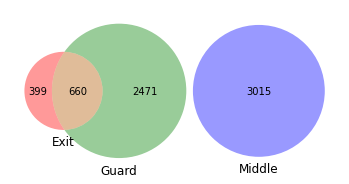

In [56]:
print("Number of relays")
v=venn3(subsets = (exit, guard, exit_guard, middle,0,0,0), set_labels = ('Exit', 'Guard', 'Middle'))
plt.show()


Bandwidth of relays


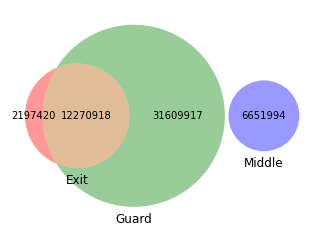

In [57]:
print("Bandwidth of relays")
v=venn3(subsets = (exit_bandwidth, guard_bandwidth, exit_guard_bandwidth, middle_bandwidth,0,0,0), set_labels = ('Exit', 'Guard', 'Middle'))
plt.show()
